**Unemployment analysis with python Task**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io
import requests
from google.colab import files

In [21]:
# Upload data
uploaded = files.upload()

Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020 (1).csv


In [22]:
# Read data
df = pd.read_csv(io.StringIO(uploaded['Unemployment_Rate_upto_11_2020.csv'].decode('utf-8')))

In [23]:
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [24]:
# Rename columns
df = df.rename(columns={
    df.columns[0]: 'State',
    df.columns[3]: 'EUR',
    df.columns[4]: 'EE',
    df.columns[5]: 'ELPR',
    df.columns[6]: 'Region'
})

In [25]:
# Calculate mean unemployment rates by region
region_stats = df.groupby(['Region'])[['EUR','EE','ELPR']].mean().round(2).reset_index()
print(region_stats)

      Region    EUR           EE   ELPR
0       East  13.92  19602366.90  40.11
1      North  15.89  13072487.92  38.70
2  Northeast  10.95   3617105.53  52.06
3      South  10.45  14040589.33  40.44
4       West   8.24  18623512.72  41.26


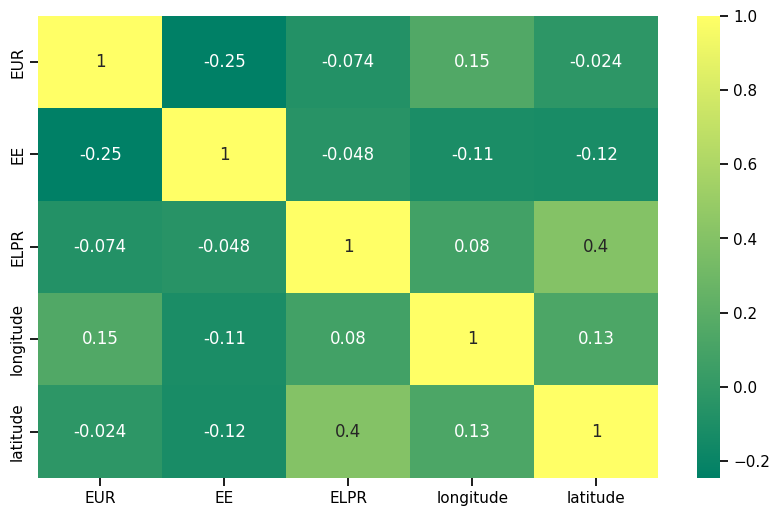

In [26]:
# Create correlation heatmap
heat_maps = df[['EUR','EE', 'ELPR','longitude', 'latitude']].corr()
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer')
plt.show()

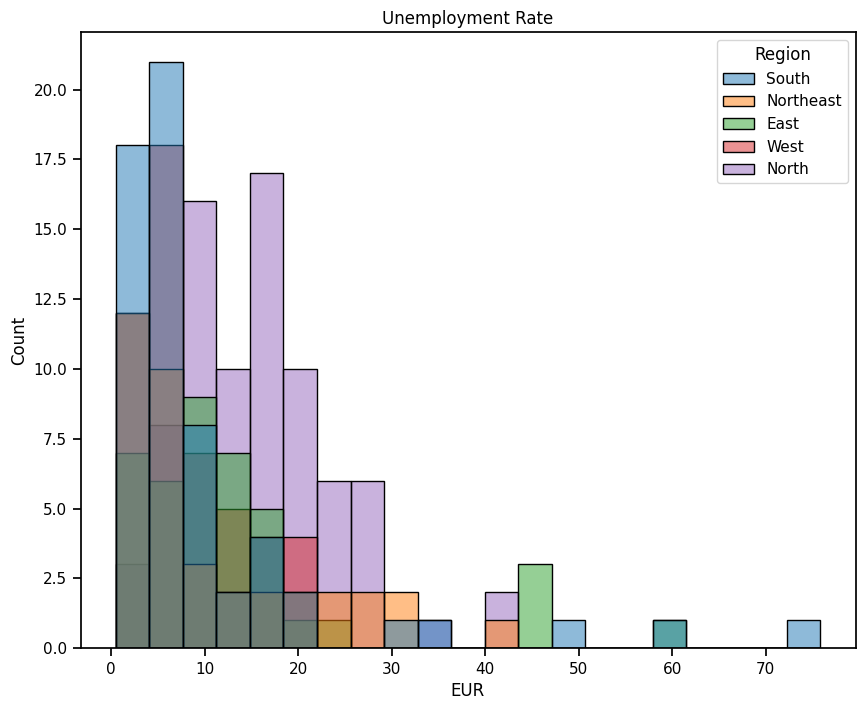

In [27]:
# Plot unemployment rate distribution by region
df.columns = ["State","Date","Frequency","EUR","EE","ELPR","Region","longitude","latitude"]
plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)
plt.show()


In [28]:
# Visualize average unemployment rate by region using bar chart
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean().reset_index()
fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [29]:
# Visualize unemployment rate by state and region using sunburst chart
unemployment = df[["State", "Region", "EUR"]]
fig = px.sunburst(unemployment, path=['Region','State'], values='EUR',
                  title='Unemployment rate in every State and Region', height=650)
fig.show()

In [32]:
fig = px.scatter(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region",template="plotly")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()